In [208]:
import unicodecsv
import seaborn as sns

In [141]:
enrollments_filename = './enrollments.csv'
engagement_filename = './daily_engagement.csv'
submissions_filename = './project_submissions.csv'

## Longer version of code (replaced with shorter, equivalent version below)

# f = open(enrollments_filename, 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def file_reader(filename):
    '''Reads the filename and returns list of dictionaries.'''
    file_list = []
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        file_list = list(reader)
    return file_list
    
enrollments = file_reader(enrollments_filename)
daily_engagement = file_reader(engagement_filename)
project_submissions = file_reader(submissions_filename)
print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0', u'num_courses_visited': u'1', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0', u'acct': u'0', u'utc_date': u'09-Jan-15'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


In [142]:
from datetime import datetime as dt
def parse_date(date):
    '''This fuction takes strig ad coverts to date type'''
    if date == '':
        return None
    else:
        return (dt.strptime(date, '%Y-%m-%d'))


In [143]:
def parse_date_engagement(date):
    '''This fuction takes strig ad coverts to date type'''
    if date == '':
        return None
    else:
        return (dt.strptime(date, '%d-%b-%y'))

In [144]:
def parse_maybe_int(i):
    '''This fuction takes a strig ad coverts it to it type else returs none if blank'''
    if i == '':
        return None
    else:
        return (int(i))

In [145]:
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
print (enrollments[0])

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}


In [146]:
for engagement in daily_engagement:
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    engagement['utc_date'] = parse_date_engagement(engagement['utc_date'])
print (daily_engagement[2])

{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 53.63374633, u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}


In [147]:
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
print (project_submissions[1])

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'INCOMPLETE', u'completion_date': datetime.datetime(2015, 1, 13, 0, 0), u'creation_date': datetime.datetime(2015, 1, 10, 0, 0)}


In [148]:
def rename_account_key(data):
    '''Rename of the "acct" key to "account_key" '''
    new_data = []
    for data_point in data:
        account_key = data_point['acct']
        del data_point['acct']
        data_point["account_key"] = account_key
        new_data.append(data_point)
    return new_data

daily_engagement_renamed = rename_account_key(daily_engagement)

In [149]:
#Comparing unique account key between the data.
def get_unique_students(data):
    '''Gives the unique account key for a given data.'''
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

print(len(enrollments))
unique_enrolled_students = get_unique_students(enrollments)
print(len(unique_enrolled_students))

print(len(daily_engagement))
unique_engagement_students = get_unique_students(daily_engagement)
print(len(unique_engagement_students))

print(len(project_submissions))
unique_project_submitters = get_unique_students(project_submissions)
print(len(unique_project_submitters))

#More unique students in enrollments table than daily_engagement table. But why?

1640
1302
136240
1237
3642
743


In [150]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

print ("The total number of rows in enrollments :{}".format(len(enrollments)))
unique_enrolled_students = get_unique_students(enrollments)
print ("The unique accout key in enrollments :{}".format(len(unique_enrolled_students)))

print ("The total number of rows in daily_engagement :{}".format(len(daily_engagement_renamed)))
unique_engagement_students = get_unique_students(daily_engagement_renamed)
print ("The unique accout key in engagement :{}".format(len(unique_engagement_students)))

print ("The total number of rows in project_submissions :{}".format(len(project_submissions)))
unique_project_submitters = get_unique_students(project_submissions)
print ("The unique accout key in project_submissions :{}".format(len(unique_project_submitters)))
    
    

The total number of rows in enrollments :1640
The unique accout key in enrollments :1302
The total number of rows in daily_engagement :136240
The unique accout key in engagement :1237
The total number of rows in project_submissions :3642
The unique accout key in project_submissions :743


In [151]:
#Why number of unique account key is different for enrollments and daily_engagement?
accout_key_not_common = unique_enrolled_students - unique_engagement_students
print(len(accout_key_not_common))

for enrollment in enrollments:
    if enrollment['account_key'] in accout_key_not_common:
        print(enrollment)
#Seems like all the records for which daily_engagement does not exist has join_date and cancel_date on same date. Also
#the days_to_cancel = 0. Since student must be enrolled for 1 full day before the data can show up in engagement table.

65
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014

In [152]:
#For the records in enrollments where unique account key is different from daily_engagement and enrollement has
#been enrolled atleast 1 day

for enrollment in enrollments:
    if enrollment['account_key'] in accout_key_not_common \
        and enrollment['join_date'] != enrollment['cancel_date']:
            print(enrollment)
#seems all this records have is_udacity = True, i.e this are test accounts for udacity.

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


In [153]:
#Identify all the test accounts in enrollments.

udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity'] == True:
        udacity_test_accounts.add(enrollment['account_key'])
print (len(udacity_test_accounts))
    

6


In [154]:
def remove_udacity_accounts(input_list):
    '''Takes list and removes the test accounts amd returns the list'''
    data_list = []
    for data_point in input_list:
        if data_point['account_key'] not in udacity_test_accounts:
            data_list.append(data_point)
    return data_list

non_udacity_erollements = remove_udacity_accounts(enrollments)
print (len(non_udacity_erollements))

non_udacity_daily_engagement = remove_udacity_accounts(daily_engagement_renamed)
print (len(non_udacity_daily_engagement))

non_udacity_project_submissions = remove_udacity_accounts(project_submissions)
print (len(non_udacity_project_submissions))

1622
135656
3634


In [155]:
#Paid students are found if the account has not been cancelled or has been cancelled after 7 days. 
#Since udacity free trial was for 7 days.
paid_students = {}
for enrollment in non_udacity_erollements:
    if enrollment['days_to_cancel'] > 7 or enrollment['days_to_cancel'] == None:
        key = enrollment['account_key']
        value = enrollment['join_date']
        
        if key not in paid_students or value > enrollment['join_date']:
            paid_students[key] = value

print(len(paid_students))


995


In [156]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_erollments= remove_free_trial_cancels(non_udacity_erollements)
paid_engagement= remove_free_trial_cancels(non_udacity_daily_engagement)
paid_submissions= remove_free_trial_cancels(non_udacity_project_submissions)

print(len(paid_erollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [157]:
#Calculating the paid_engagement_in_first_week
# def within_one_week(join_date, engagement_date):
#     eng_date = int(dt.strftime(engagement_date , "%d"))
#     join_date = int(dt.strftime(join_date , "%d"))
#     time_delta = eng_date - join_date
#     return time_delta < 7 and time_delta >=0 


def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0
    
    
paid_engagement_in_first_week = []    
for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)

print(len(paid_engagement_in_first_week))
                       
                       

6920


In [158]:
#Grouping all the engagement_record for the respective account_key
from collections import defaultdict

def group_data(data, key_name):
    engagement_by_account = defaultdict(list)
    for engagement in data:
        engagement_by_account[engagement[key_name]].append(engagement) 

    return (engagement_by_account)

grouped_data = group_data(paid_engagement_in_first_week, 'account_key')
print(grouped_data)

#https://www.accelebrate.com/blog/using-defaultdict-python/

defaultdict(<type 'list'>, {u'1200': [{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 114.853432, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 43.4168625, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 187.7768328, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 150.0815773, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 191.61088, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 8, 0, 0)}, {

In [159]:
#Creating a dictionary with key as account_key ad value as total_mins for that account_key

def sum_grouped_items(grouped_data, field_name):
    total_by_key_name_on_field_name = {}
    for key_name, data_points in grouped_data.items():
        total_on_field_name = 0
        for data in data_points:
            total_on_field_name += data[field_name]
        total_by_key_name_on_field_name[key_name] = total_on_field_name
    return(total_by_key_name_on_field_name)        

total_mins_by_account = sum_grouped_items(grouped_data,'total_minutes_visited')
print(total_mins_by_account)

{u'619': 1482.9020456300002, u'1140': 129.859203667, u'669': 0.0, u'428': 726.260759367, u'344': 614.97785633, u'0': 494.8804961, u'346': 248.12435914, u'347': 104.97653, u'340': 392.4737948, u'341': 35.531418, u'342': 0.0, u'343': 83.295313, u'811': 1138.31770153, u'812': 1764.53679834, u'348': 0.0, u'349': 211.38754403, u'816': 0.0, u'918': 21.086721, u'1149': 876.6454899400001, u'719': 9.4907925, u'718': 0.0, u'715': 307.30065097, u'426': 0.0, u'713': 139.060529, u'712': 253.23675753, u'710': 18.75089867, u'661': 92.55472316, u'129': 101.3873143, u'660': 193.848226, u'422': 311.18895363, u'1060': 1768.5227493, u'1062': 366.31941634000003, u'1067': 29.73773833, u'1066': 0.0, u'671': 115.155591003, u'427': 413.54201817, u'298': 213.46999513, u'299': 0.0, u'296': 199.060435667, u'297': 338.67828997000004, u'294': 405.60024880000003, u'295': 421.6092228, u'292': 192.665344, u'293': 497.82182546, u'290': 442.377211627, u'291': 0.0, u'591': 0.0, u'590': 512.85668046, u'593': 0.0, u'592': 

In [160]:
import numpy as np

def describe_data(data):
    print ("Mean:", np.mean(data))
    print ("Std dev:",np.std(data))
    print ("Min:",np.min(data))
    print ("Max:",np.max(data))


total_mins = total_mins_by_account.values()
print(describe_data(total_mins))


('Mean:', 325.78506539493168)
('Std dev:', 418.40526409921097)
('Min:', 0.0)
('Max:', 3564.7332645000001)
None


In [161]:
max_total_mins = np.max(total_mins)
print(max_total_mins)
accounts = []
for account_key, total_mins in total_mins_by_account.items():
    if total_mins == max_total_mins:
        accounts.append(account_key)
print((accounts))

3564.7332645
[u'163']


In [162]:
for account_key, engagement_record in engagement_by_account.items():
    if account_key in accounts:
        print(engagement_record)


[{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.5193397, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.6339233, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.0189037, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}, {u'lessons_completed': 1, u'num_cour

In [163]:
students_with_max_minutes = None
max_minutes = 0
for account_key, total_mins in total_mins_by_account.items():
    if total_mins > max_minutes:
        max_minutes = total_mins
        students_with_max_minutes = account_key
students_with_max_minutes,max_minutes

(u'163', 3564.7332645)

In [164]:
for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] == students_with_max_minutes:
        print (engagement)



{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.5193397, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.6339233, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.0189037, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_courses_vi

In [165]:
grouped_data = group_data(paid_engagement_in_first_week, 'account_key')

total_lessons_completed_by_account = sum_grouped_items(grouped_data,'lessons_completed')

total_lessons_completed = total_lessons_completed_by_account.values()

print(describe_data(total_lessons_completed))


('Mean:', 1.6904522613065327)
('Std dev:', 3.0286171606877743)
('Min:', 0)
('Max:', 36)
None


In [166]:
def has_visited(data):
    paid_engagement_in_first_week_with_has_visited = []
    for data_points in data:
        if data_points['num_courses_visited'] > 0:
            data_points['has_visited'] = 1
            paid_engagement_in_first_week_with_has_visited.append(data_points)
        else:
            data_points['has_visited'] = 0
            paid_engagement_in_first_week_with_has_visited.append(data_points)
    return paid_engagement_in_first_week_with_has_visited

paid_engagement_in_first_week_with_has_visited = has_visited(paid_engagement_in_first_week)

print(paid_engagement_in_first_week_with_has_visited)

[{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 37.28488733, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 53.63374633, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 33.48926967, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 64.77967767, u'projects_completed': 0, 'account_key': u'0', u'utc_da

In [167]:
grouped_data = group_data(paid_engagement_in_first_week_with_has_visited, 'account_key')

course_visited_days_by_account = sum_grouped_items(grouped_data,'has_visited')

total_course_visited_by_account = course_visited_days_by_account.values()

print(describe_data(total_course_visited_by_account))
       


('Mean:', 3.0422110552763817)
('Std dev:', 2.2300431831405754)
('Min:', 0)
('Max:', 7)
None


In [178]:
subway_project_lesson_keys = ['746169184','3176718735']
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and \
        (rating == 'PASSED') or (rating== 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)

648

In [180]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
len(non_passing_engagement)

4535


2385

In [191]:
print('passing students- no. of days')
grouped_data_pass_visited = group_data(passing_engagement, 'account_key')
course_visited_days_by_account_pass = sum_grouped_items(grouped_data_pass_visited,'has_visited')
total_course_visited_by_account_pass = course_visited_days_by_account_pass.values()
print(describe_data(total_course_visited_by_account_pass))

print('non passing students- no. of days')
grouped_data_non_pass_visited = group_data(non_passing_engagement, 'account_key')
course_visited_days_by_account_non_pass = sum_grouped_items(grouped_data_non_pass_visited,'has_visited')
total_course_visited_by_account_non_pass = course_visited_days_by_account_non_pass.values()
print(describe_data(total_course_visited_by_account_non_pass))

print('passing students- lessons completed')
grouped_data_pass_lessons_completed = group_data(passing_engagement, 'account_key')
total_lessons_completed_by_account_pass = sum_grouped_items(grouped_data_pass_lessons_completed,'lessons_completed')
total_lessons_completed_pass = total_lessons_completed_by_account_pass.values()
print(describe_data(total_lessons_completed_pass))

print('nonpassing students- lessons completed')
grouped_data_non_pass_lessons_completed = group_data(non_passing_engagement, 'account_key')
total_lessons_completed_by_account_non_pass = sum_grouped_items(grouped_data_non_pass_lessons_completed,'lessons_completed')
total_lessons_completed_non_pass = total_lessons_completed_by_account_non_pass.values()
print(describe_data(total_lessons_completed_non_pass))

print('passing students- total_minutes_visited')
grouped_data_pass_total_minutes_visited = group_data(passing_engagement, 'account_key')
total_mins_by_account_pass = sum_grouped_items(grouped_data_pass_total_minutes_visited,'total_minutes_visited')
total_mins_pass = total_mins_by_account_pass.values()
print(describe_data(total_mins_pass))

print('nonpassing students- total_minutes_visited')
grouped_data_non_pass_total_minutes_visited = group_data(non_passing_engagement, 'account_key')
total_mins_by_account_non_pass = sum_grouped_items(grouped_data_non_pass_total_minutes_visited,'total_minutes_visited')
total_mins_non_pass = total_mins_by_account_non_pass.values()
print(describe_data(total_mins_non_pass))

passing students- no. of days
('Mean:', 3.6080246913580245)
('Std dev:', 2.1824348842707071)
('Min:', 0)
('Max:', 7)
None
non passing students- no. of days
('Mean:', 1.9855907780979827)
('Std dev:', 1.9107823539836659)
('Min:', 0)
('Max:', 7)
None
passing students- lessons completed
('Mean:', 2.1126543209876543)
('Std dev:', 3.1566059075872399)
('Min:', 0)
('Max:', 36)
None
nonpassing students- lessons completed
('Mean:', 0.90201729106628237)
('Std dev:', 2.596089160189786)
('Min:', 0)
('Max:', 27)
None
passing students- total_minutes_visited
('Mean:', 417.94156314687189)
('Std dev:', 451.26118971197803)
('Min:', 0.0)
('Max:', 3564.7332645000001)
None
nonpassing students- total_minutes_visited
('Mean:', 153.68878140859943)
('Std dev:', 276.09150321946186)
('Min:', 0.0)
('Max:', 1768.5227493)
None


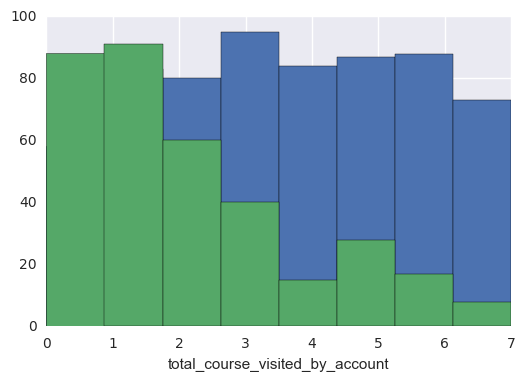

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(total_course_visited_by_account_pass, bins = 8)
plt.hist(total_course_visited_by_account_non_pass, bins = 8)
plt.xlabel("total_course_visited_by_account")

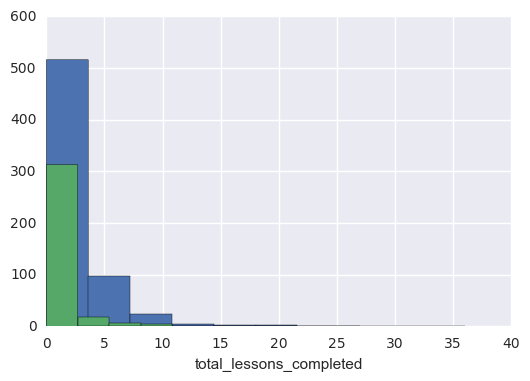

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(total_lessons_completed_pass)
plt.hist(total_lessons_completed_non_pass)
plt.xlabel("total_lessons_completed")

#### %matplotlib inline
import matplotlib.pyplot as plt

plt.hist(total_mins_pass, label = 'passing students')
plt.hist(total_mins_non_pass, label = 'non passing students')
plt.xlabel("total_mins")